**Table of contents**<a id='toc0_'></a>    
- [Importing Dataset & Libraries](#toc1_1_)    
- [Resume Score](#toc2_)    
  - [Tokenization](#toc2_1_)    
  - [Modeling](#toc2_2_)    
    - [Word2vec](#toc2_2_1_)    
    - [Hyperparameter Evaluation](#toc2_2_2_)    
    - [Word Embeddings](#toc2_2_3_)    
  - [Vectorisation & Recommendation](#toc2_3_)    
- [Missing Words](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Importing Dataset & Libraries](#toc0_)


In this section, I will explore Word2Vec vectorization for modeling and recommendations.

In [1]:
#importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#importing the word processing libraries


 #importing the regex library
import re

#importing the nltk library
import nltk


#lemmatizer
from nltk.stem import WordNetLemmatizer

#  nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

#defining the stop words
ENGLISH_STOP_WORDS = stopwords.words('english')

#library to handle punctuation
import string

#counter library
from collections import Counter

import spacy

#speech tagging library
from nltk import pos_tag

#library for word embedding
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import string

#importing document processing library
import PyPDF2
import textract



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anupajayakody/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's first read the resume and JD documents, in this case they are stored as PDFs

In [4]:
jd_path= open('./JD (2).pdf', 'rb')

jd_reader= PyPDF2.PdfReader(jd_path)

num_pages =len(jd_reader.pages)

# initialize a count for the number of pages
count = 0

# initialize a text empty etring variable
jd_text = ""

# extract text from every page on the file
while count < num_pages:
    pageObj = jd_reader.pages[count]
    count +=1
    jd_text +=pageObj.extract_text()

jd_text



'●\nChampions\na\ncust omer-focused\ncultur e\nt o\ndeepen\nclient\nr elationships\nand\nle v er age\nbr oader\nBank\nr elationships,\nsystems\nand\nknowledge.\n●\nCollabor ate\nwith\nk e y\nstak eholder\nr elationships\nin\nsuppor t\nof\npricing\ninitiativ es\n●\nW orks\ncollabor ativ ely\nwith\nk e y\nstak eholders\nincluding\nAnalytics,\nData\nEngineering,\nClient\nMeasur ement,\nT r easur y\nand\nSalesfor ce\nt o\nunderstand\ndata\ninfr astructur e\nand\npr o vide\nf eedback\nfor\nimpr o v ement\n●\nW ork\nwith\ntechnology\nand\nother\nr ele v ant\nstak eholders\nt o\nsuppor t\ndata\ninfr astructur e\nde v elopment,\nsuch\nas\nv alidating\ndata\nquality\nand\ntesting\ndata\nlinkage\n●\nContribute\nt o\ndeliv ering\nex cellent\nuser\nexperience,\nsuch\nas\nsuppor ting\npr oduct\nowners\nwith\ntr aining,\nsuppor ting\nuser\nr equests/escalations\netc.\n●\nPr oactiv ely\nsuppor t\nv arious\npricing\nstak eholders\non\ninitiativ es\nand\nad-hoc\nanalysis\n●\nUnderstands\nhow\nthe\nBank

In [5]:
pdf= open('./Anupa Jayakody.pdf', 'rb')

pdf_reader= PyPDF2.PdfReader(pdf)

num_pages =len(pdf_reader.pages)

# initialize a count for the number of pages
count = 0

# initialize a text empty etring variable
resume_text = ""

# extract text from every page on the file
while count < num_pages:
    pageObj = pdf_reader.pages[count]
    count +=1
    resume_text +=pageObj.extract_text()

In [6]:
#checking the resume contents
resume_text

'Anupa \nJayakody\nD\nA\nT\nA\nS\nC\nI\nE\nN\nT\nI\nS\nT\nanupajayakody@gmail.com\n9057829436\nLinkedIn\nPROFILE\nI\nam\na\nproven,\nchallenge-seeking\nBI\nAnalyst,\na\nMicrosoft\nCertiﬁed\nPowerBI\nAnalyst,\nand\na\nData\nScientist.\nI\npossess\nover\n7\nyears\nof\nexperience\nin\nBusiness\nIntelligence\ngeneration\nand\nProject\nManagement\nand\npivoting\na\ncareer\nto\nData\nScience\nto\nmake\nmy\ndream\nof\na\ncareer\nin\nMathematics\ncome\ntrue\nby\nutilizing\nmy\nanalytical,\nvisualization\nand\nproject\nmanagement\nskills.\nSKILLS\nMS\nPowerBI\n|\nTableau\n|\nPython\n|\nHypothesis\nTesting\n|\nA/B\nTesting\n|\nMatplotlib\n|\nSeaborn\n|\nMachine\nLearning\n|\nNLP\nDAX\n|\nPowerQuery\n|\nSQL\nAWS\n|\nHadoop\n|\nSpark\n|\nHive\nJira\n|\nAsana\n|\nSharePoint\nMicrosoft\nOfﬁce\nINTERESTS\nTravel\nBlogging-\nStory\nTelling\nTravel\nBlog\nP\nR\nO\nJ\nE\nC\nT\nS\nData\nScientist\n|F l a v o rF u z e\nFEB\n2024,\nBrainStation\nData\nScience\nDiploma-Capstone\n●\nDeveloped\na\nrecipe\nrec

# <a id='toc2_'></a>[Resume Score](#toc0_)

## <a id='toc2_1_'></a>[Tokenization](#toc0_)

Next I will
- break each word list to tokens/words
- lower case
- remove stop words
- remove verbs
- remove measuring word
- remove characters and numbers

All this is done to remove any impact from those words/tokens to the tool as the recommendation engine should only map for the true words/skills.

In [7]:
#parser to process the jd words/skills

def parser(input_keys): #function
    

    word_list = re.split('\n', input_keys) #splitting the words by commas

    cleaned_words = [] #new list to store cleaned words

    lemmatizer = WordNetLemmatizer() #lemmatizer

    for word in word_list:
        items = re.split(' ', word)  #splitting each word by space to process and clean each individual word

        items = [word for word in items if word.isalpha()] #filtering only letters

        items = [word.lower() for word in items] #lowercasing

        items = [lemmatizer.lemmatize(word) for word in items] #lemmatizing

        items = [word for word in items if word not in ENGLISH_STOP_WORDS] #removing stop words

        if items:
            #cleaned_wprds.append(' '.join(items) ) #joining the individual words of the word seperated by space
            cleaned_words.extend(items)
    

    return cleaned_words #return the list


In [8]:
# parser to process the resume words

def parser_resume(input_keys): #function
    

    word_list = re.split('\n', input_keys) #splitting the skills by commas

    cleaned_words = [] #new list to store cleaned words

    lemmatizer = WordNetLemmatizer() #lemmatizer

    for word in word_list:
        items = re.split(' ', word)  #splitting each word by space to process and clean each individual word

        items = [word for word in items if word.isalpha()] #filtering only letters

        items = [word.lower() for word in items] #lowercasing

        items = [lemmatizer.lemmatize(word) for word in items] #lemmatizing

        items = [word for word in items if word not in ENGLISH_STOP_WORDS] #removing stop words

        if items:
            cleaned_words.append(' '.join(items) ) #joining the individual words of the resume seperated by space
            #cleaned_words.extend(items)
    

    return cleaned_words #return the list


Perfect, I have my words seperated by a comma in original form.

## <a id='toc2_2_'></a>[Modeling](#toc0_)

### <a id='toc2_2_1_'></a>[Word2vec](#toc0_)

Since this is a text analysis, I will use Word2vec which will enable creating embeddings for each word which then can be  converted to a vector for further analysis.I will use an example skill set to compare against the resume.

In [9]:
#skills
skills= 'Data Visualization, Data Cleaning , MATLAB , R , Python , SQL and NoSQL, Machine Learning, Linear Algebra and Calculus, Microsoft Excel, Critical Thinking'

In [10]:
#jd words= cleaned skills 
jd_words= parser(skills)

In [11]:
#sanity check
jd_words

['data',
 'data',
 'cleaning',
 'matlab',
 'r',
 'python',
 'sql',
 'machine',
 'linear',
 'algebra',
 'microsoft',
 'critical',
 'thinking']

In [12]:
#word2vec model with starting parameters
phrases_model=Word2Vec(sentences=[jd_words],min_count=1, sg=0, window=15, workers=8, vector_size=300, compute_loss=True)  #used min_count=1 to avoid any words being missed out

### <a id='toc2_2_2_'></a>[Hyperparameter Evaluation](#toc0_)

Now I will check different options with the model to check which gives the lowest compute loss

In [13]:
#loss with vector size 300
phrases_model.get_latest_training_loss()

43.12189865112305

In [14]:
#vector size 200
phrases_model=Word2Vec(sentences=[jd_words],min_count=1, sg=0, window=15, workers=8, vector_size=200, compute_loss=True)
phrases_model.get_latest_training_loss()

43.10972213745117

In [15]:
#vector size 100
phrases_model=Word2Vec(sentences=[jd_words],min_count=1, sg=0, window=15, workers=8, vector_size=100, compute_loss=True)
phrases_model.get_latest_training_loss()

43.103633880615234

As per above, vector size 100, window size=15 and hs_val=0 gives the lowest loss factor, Combining with the earlier training losses, I will proceed with below. 

Final model selection:
 - vector size= 100
 - hs= 0
 - window= 15

In [16]:
#final model
phrases_model=Word2Vec(sentences=[jd_words],min_count=1, sg=0, window=15, workers=8, vector_size=100, compute_loss=True, hs=0)

### <a id='toc2_2_3_'></a>[Word Embeddings](#toc0_)

Checking similar words to different words/skills if the model has been trained well.  

In [17]:
#getting the word embeddings to compare different words
embeddings= {word: phrases_model.wv[word] for word in phrases_model.wv.index_to_key} 

In [18]:
print(phrases_model.wv.most_similar(u'data', topn=5)) #checking the most similar results for onion

[('r', 0.2160883992910385), ('sql', 0.09306246787309647), ('cleaning', 0.08005889505147934), ('matlab', 0.06294546276330948), ('python', 0.027115024626255035)]


I will try to use a tile map to show the similarity of a few words.

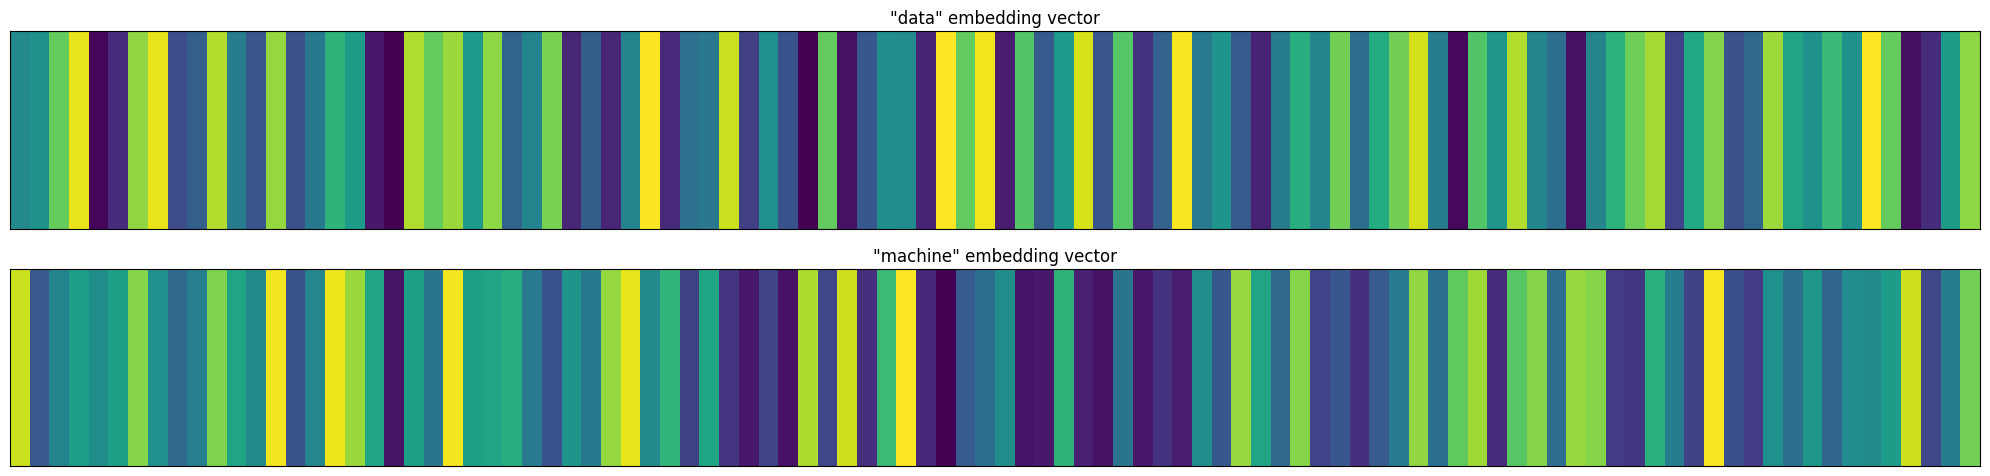

In [19]:
word_list = ['data', 'machine'] #example

plt.subplots(len(word_list), 1, figsize=(20, 5)) #plot

for i, word in enumerate(word_list): #for loop to get each word in the list
    plt.subplot(len(word_list), 1, i + 1) #subplot
    plt.imshow(np.tile(embeddings[word], (10, 1))) #data
    plt.xticks([]) #no xticks
    plt.yticks([]) #no yticks
    plt.title(f"\"{word}\" embedding vector") #title

plt.tight_layout()
plt.show()

It is visible that words represent different distributions. Looks good. 

## <a id='toc2_3_'></a>[Vectorisation & Recommendation](#toc0_)

Next I will create a function to do the comparison operation. This is done by taking the mean of the vectors created for words and then using those mean vectors to calculate the cosine similarity between the resume and the jd skills.

In [20]:

def recommender(resume_input):

    
    resume_input=parser_resume(resume_input)
    
   
    

# mean Embeddings for User Input
    resume_mean_vector =np.mean([phrases_model.wv[word] for word in resume_input if word in phrases_model.wv] or [np.zeros(100)], axis=0)




# check if user_mean_vector contains NaN values
    if np.isnan(resume_mean_vector).any():
        print("Resume input vectors contain NaN values.")


    else:

    # mean  vectors
       jd_vectors =np.mean([phrases_model.wv[word] for word in jd_words if word in phrases_model.wv] or [np.zeros(100)], axis=0)




    # Check if any vector contains NaN values
    if not jd_vectors.any():
            print('nothing obtained for JD vectors')

    else:
        
        # cosine similarity between user mean vector and resume mean vectors
            
            resume_mean_vector = resume_mean_vector.reshape(1,-1)
            jd_vectors= jd_vectors.reshape(1,-1)
            
            print("user_mean_vector shape:", resume_mean_vector.shape)
            print("resume_vectors shape:", jd_vectors.shape)
            
            
                                                        
            cosine_similarities = cosine_similarity(resume_mean_vector, jd_vectors)



    return cosine_similarities
  


In [21]:
#running the recommender
recommender(resume_text)

user_mean_vector shape: (1, 100)
resume_vectors shape: (1, 100)


array([[0.6900322]], dtype=float32)

# <a id='toc3_'></a>[Missing Words](#toc0_)

Next I will check the common and missing words between the JD and the resume and hilight them. 

In [22]:
jd_cleaned = parser(skills)
jd_cleaned= ' '.join(jd_cleaned)

resume_cleaned = parser_resume(resume_text)
resume_cleaned= ' '.join(resume_cleaned)

#combining the cleaned words from the resume and the jd
combined_text = [resume_cleaned, jd_cleaned]

In [23]:
#defining a count vectoriser
vectorizer = CountVectorizer()

# fit and transform the vectorizer on the list of texts
X = vectorizer.fit_transform(combined_text)

# get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# convert the sparse matrix to a dense array
dense_array = X.toarray()


In [24]:
#getting the resum and jd vectors seperately
resume_vector = X[0].toarray()
jd_vector = X[1].toarray()

# extract words present in both the JD and resume
common_words = [word for word in feature_names if resume_vector[0, vectorizer.vocabulary_[word]] > 0 and jd_vector[0, vectorizer.vocabulary_[word]] > 0]

# extract words present in the JD but missing in the resume
missing_words_in_resume = [word for word in feature_names if jd_vector[0, vectorizer.vocabulary_[word]] > 0 and resume_vector[0, vectorizer.vocabulary_[word]] == 0]

# display the results
print("Common Words:", common_words)
print("Missing Words in Resume:", missing_words_in_resume)

Common Words: ['data', 'machine', 'microsoft', 'python', 'sql']
Missing Words in Resume: ['algebra', 'cleaning', 'critical', 'linear', 'matlab', 'thinking']
